In [1]:
from scipy import stats
import matplotlib.pyplot as plt

'''
Function that takes in two dataframe columns and plots a log-log graph
Follows standardised formatting
@input recorded: dataframe column of recorded data
@input predicted: dataframe column of the predicted value
@input xmin: lower bound of graph's x axis
@input xmax: upper bound of graph's x axis
@input ymin: lower bound of graph's y axis
@input ymax: upper bound of graph's y axis
@input xTitle: title for x axis
@input yTitle: title for y axis
@output log log graph of the preducted values against recorded values
'''


def logLogPlotter(recorded, predicted, xmin, xmax, ymin, ymax, xTitle, yTitle, unit):
    x = recorded
    y = predicted

    coefficients = np.polyfit(np.log(x), np.log(y), 1)
    line_function = np.poly1d(coefficients)

    # Create a range for predicted values for the fit line
    x_vals = np.linspace(min(x), max(y), 400)
    y_vals = np.exp(line_function(np.log(x_vals)))

    #calculate similarity measures
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

    #best fit line and y = x line
    plt.scatter(x, y, c='red', marker='x')
    plt.plot(x_vals, y_vals, color='red', label=f'Fit: y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}')
    plt.axline((0, 0), (1,1),color='black',linestyle='--', label=f'y=x, R^2 = {r_value ** 2}',)

    #visuals
    font_family = 'Times New Roman'
    title_font_size=17
    label_font_size=15
    legend_tick_font_size=12

    plt.title(f'Predicted {yTitle} against Recorded {xTitle}', fontsize=title_font_size, fontfamily=font_family)
    plt.xlabel(f'Recorded {xTitle} ({unit})', fontsize=label_font_size, fontfamily=font_family)
    plt.ylabel(f'Predicted {yTitle} ({unit})', fontsize=label_font_size, fontfamily=font_family)

    plt.legend(fontsize = legend_tick_font_size)
    plt.loglog()
    plt.xlim(xmax=xmax, xmin=xmin)
    plt.ylim(ymax=ymax, ymin=ymin)

    plt.show()

In [2]:
'''>>>>> start CodeP4.1F23
V.P. Carey ME249, Fall 2023
Keras Neural Network Modeling '''
#import useful packages
import keras
import pandas as pd
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
#the following 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# define meadian values of input variables - add your values here

import statistics
xdata = []
ydata = []
#xdata.append([ Di(m), qoflux (kW/m^2), mdot (kg/s)])

xdata.append([0.008, 550, 0.06157])
xdata.append([0.008, 651, 0.07269])
xdata.append([0.008, 750, 0.08396])
xdata.append([0.008, 850, 0.09347])
xdata.append([0.008, 950, 0.10635])
xdata.append([0.008, 1050, 0.11521])
xdata.append([0.008, 1150, 0.1287])
xdata.append([0.008, 850, 0.09516])
xdata.append([0.008, 550, 0.04398])
xdata.append([0.008, 750, 0.05997])
xdata.append([0.008, 950, 0.07596])
xdata.append([0.008, 1050, 0.08343])
xdata.append([0.008, 1150, 0.0919])
xdata.append([0.008, 850, 0.06797])
xdata.append([0.008, 550, 0.0342])
xdata.append([0.008, 750, 0.04664])
xdata.append([0.008, 950, 0.05908])
xdata.append([0.008, 1150, 0.0715])
xdata.append([0.008, 850, 0.05286])
xdata.append([0.011, 550, 0.0846])
xdata.append([0.011, 750, 0.1154])
xdata.append([0.011, 950, 0.1462])
xdata.append([0.011, 1150, 0.177])
xdata.append([0.011, 850, 0.1308])
xdata.append([0.011, 550, 0.06047])
xdata.append([0.011, 750, 0.08246])
xdata.append([0.011, 950, 0.1044])
xdata.append([0.011, 1050, 0.1134])
xdata.append([0.011, 1150, 0.1264])
xdata.append([0.011, 850, 0.0934])
xdata.append([0.011, 550, 0.047])
xdata.append([0.011, 750, 0.06413])
xdata.append([0.011, 950, 0.08124])
xdata.append([0.011, 1150, 0.09834])
xdata.append([0.011, 850, 0.072691])
xdata.append([0.011, 700, 0.087196])
xdata.append([0.013, 550, 0.10005])
xdata.append([0.013, 750, 0.13644])
xdata.append([0.013, 950, 0.17282])
xdata.append([0.013, 1150, 0.2092])
xdata.append([0.013, 850, 0.15463])
xdata.append([0.013, 550, 0.07147])
xdata.append([0.013, 750, 0.09745])
xdata.append([0.013, 950, 0.12344])
xdata.append([0.013, 1050, 0.13302])
xdata.append([0.013, 1150, 0.1494])
xdata.append([0.013, 850, 0.11045])
xdata.append([0.013, 550, 0.05558])
xdata.append([0.013, 750, 0.0758])
xdata.append([0.013, 950, 0.09601])
xdata.append([0.013, 1150, 0.1162])
xdata.append([0.013, 850, 0.0859])

#ydata.append([ exit quality, max wall temperature (deg C)])
ydata.append([0.525, 306.7])
ydata.append([0.525, 298.5])
ydata.append([0.525, 294.5])
ydata.append([0.525, 290.2])
ydata.append([0.524, 286.9])
ydata.append([0.524, 284.1])
ydata.append([0.525, 281.7])
ydata.append([0.524, 290.3])
ydata.append([0.734, 307.9])
ydata.append([0.735, 295.5])
ydata.append([0.735, 287.8])
ydata.append([0.735, 285.0])
ydata.append([0.735, 282.5])
ydata.append([0.734, 291.3])
ydata.append([ 0.945, 308.6])
ydata.append([0.945, 296.2])
ydata.append([0.945, 288.5])
ydata.append([0.945, 283.1])
ydata.append([0.945, 291.9])
ydata.append([ 0.525, 328.0])
ydata.append([0.525, 311.2])
ydata.append([0.525, 300.8])
ydata.append([0.525, 293.6])
ydata.append([0.525, 305.5])
ydata.append([0.735, 329.6])
ydata.append([0.735, 312.6])
ydata.append([0.735, 302.0])
ydata.append([0.735, 299.4])
ydata.append([0.735, 294.8])
ydata.append([0.735, 306.8])
ydata.append([ 0.945, 330.7])
ydata.append([0.945, 313.6])
ydata.append([0.944, 302.9])
ydata.append([0.945, 295.6])
ydata.append([0.944, 307.7])
ydata.append([0.734, 324.7])
ydata.append([0.525, 342.2])
ydata.append([0.524, 322.3])
ydata.append([0.524, 310.0])
ydata.append([0.525, 301.6])
ydata.append([0.524, 315.5])
ydata.append([0.734, 344.1])
ydata.append([0.735, 324.0])
ydata.append([0.735, 311.5])
ydata.append([0.735, 306.3])
ydata.append([0.735, 302.9])
ydata.append([0.734, 317.1])
ydata.append([0.945, 345.3])
ydata.append([0.944, 325.1])
ydata.append([0.944, 312.5])
ydata.append([0.945, 303.9])
ydata.append([0.945, 318.2])
xarray= np.array(xdata)
yarray= np.array(ydata)
x_original = np.array(xdata)
y_original = np.array(ydata)
# print (xdata)
# print (xarray)
# print (ydata)
# print (yarray)

#convert to:
# median values of output variables
ND=len(xarray)
Taall = [row[0] for row in xdata]
Tamed=statistics.median(Taall)
print(Tamed)
IDall = [row[1] for row in xdata]
IDmed=statistics.median(IDall)
RLall = [row[2] for row in xdata]
RLmed=statistics.median(RLall)

VLall = [row[0] for row in ydata]
VLmed=statistics.median(VLall)
Wdall = [row[1] for row in ydata]
Wdmed=statistics.median(Wdall)

xdata = []
ydata = []
for i in range(ND):
    xdata.append([xarray[i,0]/Tamed,xarray[i,1]/IDmed,xarray[i,2]/RLmed])
    ydata.append([yarray[i,0]/VLmed,yarray[i,1]/Wdmed])

xarray= np.array(xdata)
yarray= np.array(ydata)

#print (yarray)

data_inputs = np.array(xdata)
data_outputs = np.array(ydata)

Using TensorFlow backend.


0.011


# DATA


In [3]:
xdata_df = pd.DataFrame(x_original, columns=['Di', 'qoflux', 'mdot'])
ydata_df = pd.DataFrame(y_original, columns=['exit_quality', 'max_wall_temperature'])


In [4]:
xdata_df[:5]

,Di,qoflux,mdot
0,0.008,550.0,0.06157
1,0.008,651.0,0.07269
2,0.008,750.0,0.08396
3,0.008,850.0,0.09347
4,0.008,950.0,0.10635


In [5]:
ydata_df[:5]

,exit_quality,max_wall_temperature
0,0.525,306.7
1,0.525,298.5
2,0.525,294.5
3,0.525,290.2
4,0.524,286.9


In [6]:
xdata_df.median()

Di          0.01100
qoflux    850.00000
mdot        0.09265
dtype: float64

In [7]:
ydata_df.median()

exit_quality              0.735
max_wall_temperature    304.700
dtype: float64

In [8]:
xdata_normalized = xdata_df.divide(xdata_df.median())
xdata_normalized

,Di,qoflux,mdot
0,0.727273,0.647059,0.664544
1,0.727273,0.765882,0.784566
2,0.727273,0.882353,0.906206
3,0.727273,1.000000,1.008851
4,0.727273,1.117647,1.147868
5,0.727273,1.235294,1.243497
6,0.727273,1.352941,1.389099
7,0.727273,1.000000,1.027091
8,0.727273,0.647059,0.474690
9,0.727273,0.882353,0.647275


In [9]:
ydata_normalized = ydata_df.divide(ydata_df.median())
ydata_normalized[:5]

,exit_quality,max_wall_temperature
0,0.714286,1.006564
1,0.714286,0.979652
2,0.714286,0.966524
3,0.714286,0.952412
4,0.712925,0.941582


In [10]:
from sklearn.model_selection import train_test_split
training_input,validation_input,training_output,validation_output = train_test_split(xarray,
yarray, test_size=0.25, random_state=13)
# print to check the shape of training and validation set
training_input= np.array(training_input)#[:,[1,2,3]])
training_output= np.array(training_output)
validation_input= np.array(validation_input)#[:,[1,2,3]])
validation_output= np.array(validation_output)

# print(validation_input)

xarray=training_input
yarray=training_output


In [11]:
x_train = pd.DataFrame(training_input, columns=['Di', 'qoflux', 'mdot'])
x_validate = pd.DataFrame(validation_input, columns=['Di', 'qoflux', 'mdot'])

y_train = pd.DataFrame(training_output, columns=['exit_quality', 'max_wall_temperature'])
y_validate = pd.DataFrame(validation_output, columns=['exit_quality', 'max_wall_temperature'])

In [12]:
# define neural network model
#As seen below, we have created four dense layers.
#A dense layer is a layer in neural network that’s fully connected.
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 1 in our case.
#The activation function we have chosen is elu, which stands for exponential linear unit. .
from keras import backend as K
#initialize weights with values between -0.2 and 0.5
initializer = keras.initializers.RandomUniform(minval= -0.2, maxval=0.5)
model = keras.Sequential([
keras.layers.Dense(6, activation=K.elu, input_shape=[3], kernel_initializer=initializer),
keras.layers.Dense(8, activation=K.elu, kernel_initializer=initializer),
keras.layers.Dense(16, activation=K.elu, kernel_initializer=initializer),
keras.layers.Dense(8, activation=K.elu, kernel_initializer=initializer),
keras.layers.Dense(2, kernel_initializer=initializer)
])

2023-12-11 21:50:58.154870: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-11 21:50:58.155837: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [13]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation.
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks.
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here
#is mean squared error. After the compilation of the model, we’ll use the fit method with ~500 epochs.
#Number of epochs can be varied.
#from tf.keras import optimizers
rms = keras.optimizers.RMSprop(0.01)
model.compile(loss='mean_absolute_error',optimizer=rms)

In [14]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training.
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again.
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs
#I found acceptable prediction accuracy.
#The fit method takes three parameters; namely, x, y, and number of epochs.
#During model training, if all the batches of data are seen by the model once,
#we say that one epoch has been completed.
# Add an early stopping callback
es = keras.callbacks.EarlyStopping(
monitor='loss',
mode='min',
patience = 80,
restore_best_weights = True,
verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss',
mode='min', verbose=1, save_best_only=True)
historyData = model.fit(xarray,yarray,epochs=800,callbacks=[es])
loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))
model.save('./best_model')

Epoch 1/800
39/39 [==============================] - 0s 10ms/step - loss: 1.0980
Epoch 2/800
39/39 [==============================] - 0s 118us/step - loss: 0.3787
Epoch 3/800
39/39 [==============================] - 0s 89us/step - loss: 0.2749
Epoch 4/800
39/39 [==============================] - 0s 116us/step - loss: 0.2568
Epoch 5/800
39/39 [==============================] - 0s 104us/step - loss: 0.3214
Epoch 6/800
39/39 [==============================] - 0s 107us/step - loss: 0.3706
Epoch 7/800
39/39 [==============================] - 0s 112us/step - loss: 0.2616
Epoch 8/800
39/39 [==============================] - 0s 106us/step - loss: 0.4986
Epoch 9/800
39/39 [==============================] - 0s 101us/step - loss: 0.2279
Epoch 10/800
39/39 [==============================] - 0s 102us/step - loss: 0.2316
Epoch 11/800
39/39 [==============================] - 0s 122us/step - loss: 0.2412
Epoch 12/800
39/39 [==============================] - 0s 124us/step - loss: 0.2267
Epoch 13/800
39

39/39 [==============================] - 0s 83us/step - loss: 0.1217
Epoch 101/800
39/39 [==============================] - 0s 108us/step - loss: 0.1323
Epoch 102/800
39/39 [==============================] - 0s 120us/step - loss: 0.0743
Epoch 103/800
39/39 [==============================] - 0s 103us/step - loss: 0.0955
Epoch 104/800
39/39 [==============================] - 0s 91us/step - loss: 0.0845
Epoch 105/800
39/39 [==============================] - 0s 98us/step - loss: 0.1415
Epoch 106/800
39/39 [==============================] - 0s 94us/step - loss: 0.0963
Epoch 107/800
39/39 [==============================] - 0s 87us/step - loss: 0.0910
Epoch 108/800
39/39 [==============================] - 0s 111us/step - loss: 0.1051
Epoch 109/800
39/39 [==============================] - 0s 90us/step - loss: 0.0937
Epoch 110/800
39/39 [==============================] - 0s 94us/step - loss: 0.1199
Epoch 111/800
39/39 [==============================] - 0s 113us/step - loss: 0.1122
Epoch 112/800

39/39 [==============================] - 0s 101us/step - loss: 0.0522
Epoch 199/800
39/39 [==============================] - 0s 94us/step - loss: 0.0887
Epoch 200/800
39/39 [==============================] - 0s 89us/step - loss: 0.0674
Epoch 201/800
39/39 [==============================] - 0s 95us/step - loss: 0.1658
Epoch 202/800
39/39 [==============================] - 0s 95us/step - loss: 0.1065
Epoch 203/800
39/39 [==============================] - 0s 93us/step - loss: 0.0709
Epoch 204/800
39/39 [==============================] - 0s 100us/step - loss: 0.0947
Epoch 205/800
39/39 [==============================] - 0s 107us/step - loss: 0.0639
Epoch 206/800
39/39 [==============================] - 0s 87us/step - loss: 0.0656
Epoch 207/800
39/39 [==============================] - 0s 96us/step - loss: 0.1394
Epoch 208/800
39/39 [==============================] - 0s 95us/step - loss: 0.0834
Epoch 209/800
39/39 [==============================] - 0s 104us/step - loss: 0.1003
Epoch 210/800


39/39 [==============================] - 0s 84us/step - loss: 0.0858
Epoch 297/800
39/39 [==============================] - 0s 92us/step - loss: 0.0686
Epoch 298/800
39/39 [==============================] - 0s 90us/step - loss: 0.0604
Epoch 299/800
39/39 [==============================] - 0s 81us/step - loss: 0.0499
Epoch 300/800
39/39 [==============================] - 0s 139us/step - loss: 0.0597
Epoch 301/800
39/39 [==============================] - 0s 114us/step - loss: 0.0878
Epoch 302/800
39/39 [==============================] - 0s 98us/step - loss: 0.0581
Epoch 303/800
39/39 [==============================] - 0s 92us/step - loss: 0.0536
Epoch 304/800
39/39 [==============================] - 0s 90us/step - loss: 0.1164
Epoch 305/800
39/39 [==============================] - 0s 99us/step - loss: 0.0782
Epoch 306/800
39/39 [==============================] - 0s 100us/step - loss: 0.0717
Epoch 307/800
39/39 [==============================] - 0s 97us/step - loss: 0.0548
Epoch 308/800
3

39/39 [==============================] - 0s 102us/step - loss: 0.0653
Epoch 395/800
39/39 [==============================] - 0s 96us/step - loss: 0.0429
Epoch 396/800
39/39 [==============================] - 0s 103us/step - loss: 0.0517
Epoch 397/800
39/39 [==============================] - 0s 95us/step - loss: 0.0540
Epoch 398/800
39/39 [==============================] - 0s 97us/step - loss: 0.0549
Epoch 399/800
39/39 [==============================] - 0s 89us/step - loss: 0.0756
Epoch 400/800
39/39 [==============================] - 0s 97us/step - loss: 0.0620
Epoch 401/800
39/39 [==============================] - 0s 91us/step - loss: 0.0877
Epoch 402/800
39/39 [==============================] - 0s 118us/step - loss: 0.0712
Epoch 403/800
39/39 [==============================] - 0s 106us/step - loss: 0.0693
Epoch 404/800
39/39 [==============================] - 0s 112us/step - loss: 0.0398
Epoch 405/800
39/39 [==============================] - 0s 92us/step - loss: 0.0964
Epoch 406/800

In [15]:
# This line of code can be used to reconstruct the saved model.
# recon_model = keras.models.load_model("best_model")
# the name of the model is now "recon_model". You can then use this model to do predictions for comparisons.
# See the previous project for code to do the comparisons.
# NOTE: If you get an error message when trying to run with the line
# recon_model = tf.keras.models.load_model("best_model")
# try running prediction calculations with model.predict() (as in the code for project 2)
# with the line recon_model = tf.keras.models.load_model("best_model") removed.
# That may avoid the error

## (e) Training Set

In [16]:
y_predictions_df = pd.DataFrame(model.predict(x_train), columns=['exit_quality', 'max_wall_temperature'])
y_predictions_df[:5]

,exit_quality,max_wall_temperature
0,1.183605,0.907834
1,1.054256,0.973630
2,1.102564,1.018516
3,0.598070,0.989627
4,0.630968,0.933961


In [17]:
y_recorded_df = y_train
y_recorded_df[:5]

,exit_quality,max_wall_temperature
0,1.285714,0.929111
1,1.285714,0.972104
2,1.285714,1.029209
3,0.714286,0.989826
4,0.712925,0.932393


### MAE

In [18]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_recorded_df['exit_quality'], y_predictions_df['exit_quality'])
print(f'MAE: {mae}')

MAE: 0.13852056956470024


### Log-log Plot

/Users/shawnchan/opt/anaconda3/envs/MECENG249/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/Users/shawnchan/opt/anaconda3/envs/MECENG249/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


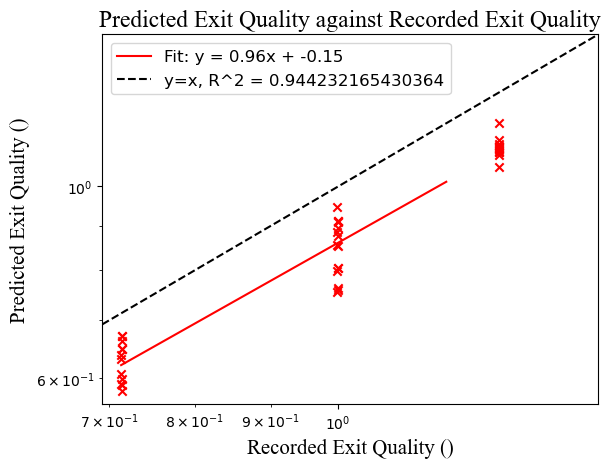

In [19]:
logLogPlotter(y_recorded_df['exit_quality'], y_predictions_df['exit_quality'], -0.5, 1.5, -0.5, 1.5, 'Exit Quality', 'Exit Quality', '')

## (f) Validation Set

In [20]:
y_predictions_df = pd.DataFrame(model.predict(x_validate), columns=['exit_quality', 'max_wall_temperature'])
y_predictions_df[:5]

,exit_quality,max_wall_temperature
0,0.840897,1.058697
1,0.628925,0.945561
2,0.615141,1.015754
3,1.057849,0.980659
4,0.674170,1.008466


In [21]:
y_recorded_df = y_validate
y_recorded_df[:5]

,exit_quality,max_wall_temperature
0,1.000000,1.063341
1,0.712925,0.941582
2,0.714286,1.021332
3,1.285714,0.997374
4,0.714286,1.006564


In [22]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_recorded_df['exit_quality'], y_predictions_df['exit_quality'])
print(f'MAE: {mae}')

MAE: 0.1581710753735293


/Users/shawnchan/opt/anaconda3/envs/MECENG249/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
/Users/shawnchan/opt/anaconda3/envs/MECENG249/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


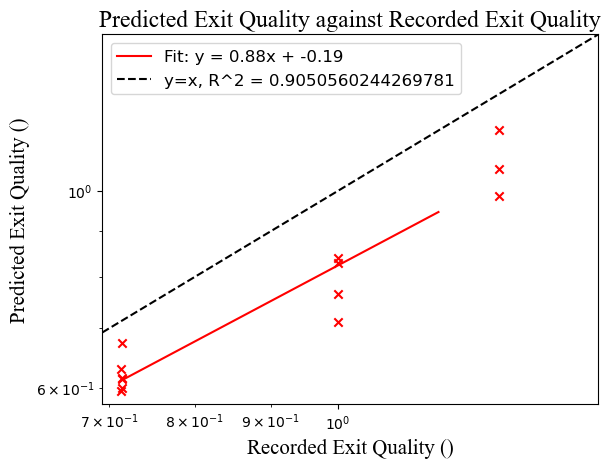

In [23]:
logLogPlotter(y_recorded_df['exit_quality'], y_predictions_df['exit_quality'], -0.5, 1.5, -0.5, 1.5, 'Exit Quality', 'Exit Quality', '')

In [44]:
ydata_df.median()

exit_quality              0.735
max_wall_temperature    304.700
dtype: float64

In [48]:
xdata_df.median()

Di          0.01100
qoflux    850.00000
mdot        0.09265
dtype: float64

## (g)


In [65]:
test = []
numeriter=100
outpt1=np.zeros((numeriter,numeriter))
outpt2=np.zeros((numeriter,numeriter))

#normalized
Di=np.linspace(0.008,0.013,numeriter)
DiNorm=Di/xdata_df.median()['Di']
mdot=np.linspace(0.05,0.15,numeriter)
mdotNorm=mdot/xdata_df.median()['mdot']


rec_massFlowRate = []
rec_D = []

for i in range(len(Di)):
    for j in range(len(mdot)):
        test = [[DiNorm[i] , 750/xdata_df.median()['qoflux'], mdotNorm[j] ]]
        testarray = np.array(test)
        a= model.predict(testarray)
        outpt1[i,j] = a[0,0]
        
        outpt2[i,j] = a[0,1]
        if np.abs(outpt2[i, j]*304.7 - 310) < 1:
            rec_massFlowRate.append(testarray[0][2])
            rec_D.append(testarray[0][1])

outpt1=outpt1*ydata_df.median()['exit_quality'] #check
outpt2=outpt2*ydata_df.median()['max_wall_temperature']
print('done')

done


In [75]:
rec_massFlowRate_df = pd.DataFrame(rec_massFlowRate, columns=['mdot'])
rec_massFlowRate_df

,mdot
0,1.030270
1,1.041173
2,1.052075
3,1.062977
4,1.073880
5,1.084782
6,1.095684
7,1.106587
8,1.117489
9,1.128391


In [74]:
rec_D_df = pd.DataFrame(rec_D, columns=['Diameter'])
rec_D_df

,Diameter
0,0.882353
1,0.882353
2,0.882353
3,0.882353
4,0.882353
5,0.882353
6,0.882353
7,0.882353
8,0.882353
9,0.882353


In [50]:
0.75482094 * 0.01100

0.00830303034

In [51]:
0.55056774 * 0.09265

0.051010101110999996

In [62]:
0.95684114 * 0.0110

0.010525252539999998

In [63]:
0.86673535 * 0.09265

0.0803030301775

In [30]:
outpt1

array([[0.74134947, 0.73132492, 0.72132437, ..., 0.40208872, 0.40272364,
        0.40338521],
       [0.74488437, 0.73484807, 0.72483622, ..., 0.40217392, 0.40280036,
        0.40345369],
       [0.7484232 , 0.73837516, 0.72835175, ..., 0.40226194, 0.40287978,
        0.40352483],
       ...,
       [1.08547321, 1.07544488, 1.06540525, ..., 0.43009866, 0.42932805,
        0.42862508],
       [1.08899785, 1.07897066, 1.06893244, ..., 0.4306723 , 0.42987952,
        0.429155  ],
       [1.09252223, 1.08249636, 1.07245953, ..., 0.43125347, 0.43043831,
        0.42969206]])

### Surface Plot: Exit Quality

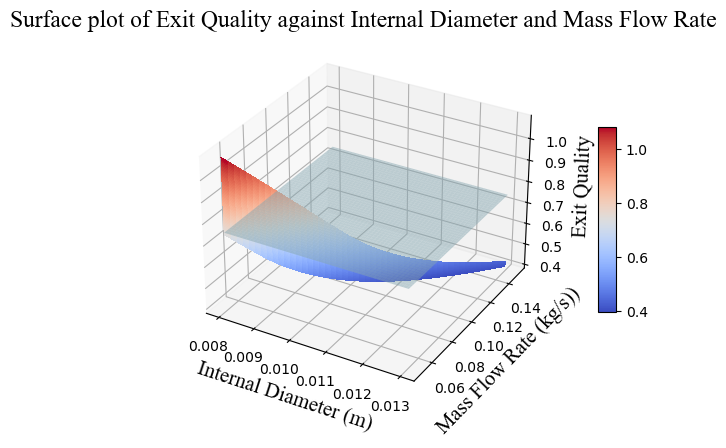

In [25]:
font_family = 'Times New Roman'
title_font_size=17
label_font_size=15
legend_tick_font_size=12
#SETTING UP PLOT

#Surface Plot
from matplotlib import cm
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(Di, mdot, outpt1,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Create a plane in the XY plane at Z = 310
z_plane = 0.75
x_range = np.linspace(Di.min(), Di.max(), 100)  # Adjust based on your Di range
y_range = np.linspace(mdot.min(), mdot.max(), 100)  # Adjust based on your mdot range
X, Y = np.meshgrid(x_range, y_range)
Z = np.full_like(X, z_plane)
# Plot the plane
ax.plot_surface(X, Y, Z, color='lightblue', alpha=0.5) 




fig.colorbar(surf, shrink=0.5, aspect=10, pad=0.1)
plt.xlabel("Internal Diameter (m)", fontsize=label_font_size, fontfamily=font_family)
plt.ylabel("Mass Flow Rate (kg/s))", fontsize=label_font_size, fontfamily=font_family)
ax.set_zlabel('Exit Quality', fontsize=label_font_size, fontfamily=font_family)
plt.title('Surface plot of Exit Quality against Internal Diameter and Mass Flow Rate', fontsize=title_font_size, fontfamily=font_family)
plt.show()

### Surface Plot: Max Wall Temp 

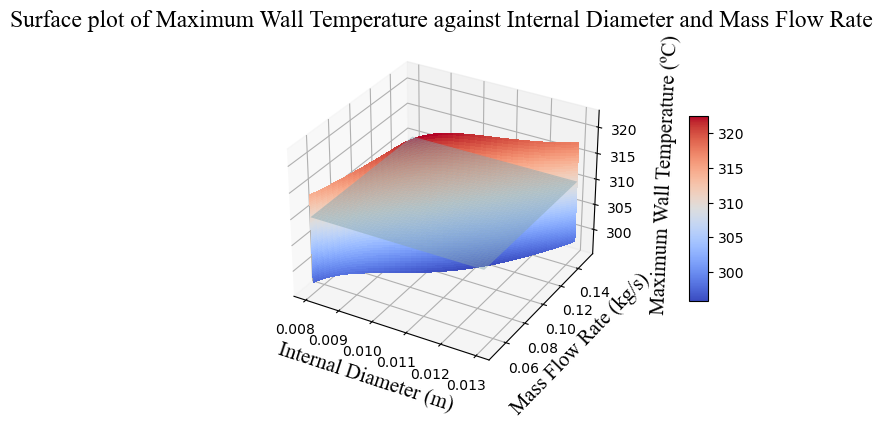

In [29]:
font_family = 'Times New Roman'
title_font_size=17
label_font_size=15
legend_tick_font_size=12
#SETTING UP PLOT

#Surface Plot
from matplotlib import cm
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(Di, mdot, outpt2,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Create a plane in the XY plane at Z = 310
z_plane = 310
x_range = np.linspace(Di.min(), Di.max(), 100)  # Adjust based on your Di range
y_range = np.linspace(mdot.min(), mdot.max(), 100)  # Adjust based on your mdot range
X, Y = np.meshgrid(x_range, y_range)
Z = np.full_like(X, z_plane)
# Plot the plane
ax.plot_surface(X, Y, Z, color='lightblue', alpha=0.5) 



fig.colorbar(surf, shrink=0.5, aspect=10, pad=0.15)
plt.xlabel("Internal Diameter (m)", fontsize=label_font_size, fontfamily=font_family)
plt.ylabel("Mass Flow Rate (kg/s)", fontsize=label_font_size, fontfamily=font_family)
ax.set_zlabel('Maximum Wall Temperature (ºC)', fontsize=label_font_size, fontfamily=font_family, labelpad=10)
plt.title('Surface plot of Maximum Wall Temperature against Internal Diameter and Mass Flow Rate', fontsize=title_font_size, fontfamily=font_family)
plt.show()

In [27]:
pd.DataFrame(outpt2)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,297.261762,297.404911,297.531896,297.643045,297.738575,297.818921,297.884666,297.937116,297.976527,298.003333,...,297.192276,297.285408,297.380829,297.478465,297.578390,297.680458,297.784705,297.891095,297.999592,298.110160
1,297.437057,297.586054,297.718778,297.835485,297.936535,298.022221,298.092870,298.149679,298.193412,298.224359,...,297.336623,297.428412,297.522489,297.618854,297.717471,297.818267,297.921280,298.026435,298.133697,298.243029
2,297.610935,297.765853,297.904280,298.026653,298.133225,298.224323,298.300238,298.361588,298.409643,298.444804,...,297.482134,297.572578,297.665311,297.760368,297.857642,297.957167,298.058908,298.162792,298.268819,298.376953
3,297.783434,297.944236,298.088475,298.216514,298.328679,298.425226,298.506481,298.572698,298.625148,298.664559,...,297.628806,297.717870,297.809259,297.902973,297.998938,298.097192,298.197626,298.300275,298.405030,298.511929
4,297.954479,298.121238,298.271325,298.405103,298.522862,298.624894,298.711524,298.783044,298.839963,298.883659,...,297.776677,297.864361,297.954370,298.046739,298.141397,298.238307,298.337469,298.438811,298.542331,298.647959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,313.515210,313.697624,313.882472,314.069718,314.259506,314.451909,314.646782,314.844307,315.044520,315.247457,...,317.026125,316.949774,316.876583,316.806588,316.739718,316.676043,316.615529,316.558102,316.503836,316.452693
96,313.686364,313.868452,314.052900,314.239819,314.429243,314.621211,314.815757,315.012955,315.212805,315.415415,...,317.296405,317.218565,317.143884,317.072364,317.004004,316.938841,316.876837,316.817957,316.762202,316.709606
97,313.857555,314.039279,314.223364,314.409920,314.598981,314.790549,314.984768,315.181567,315.381089,315.583336,...,317.567411,317.488082,317.411876,317.338830,317.269017,317.202365,317.138836,317.078467,317.021258,316.967173
98,314.028673,314.210070,314.393865,314.580020,314.768719,314.959887,315.153707,315.350179,315.549338,315.751222,...,317.839108,317.758253,317.680594,317.606059,317.534684,317.466506,317.401524,317.339702,317.281004,317.225430
